In [1]:
%matplotlib inline
import csv, random
from numpy import genfromtxt
import sys
import numpy as np
import numpy.random as rnd
import time
import gpflow
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import GPy
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

/Applications/anaconda3/lib/python3.6/site-packages/multipledispatch/dispatcher.py:24: AmbiguityWarning: 
Ambiguities exist in dispatched function _expectation

The following signatures may result in ambiguous behavior:
	[Gaussian, Linear, NoneType, Sum, InducingPoints], [Gaussian, Identity, NoneType, Kernel, InducingPoints]


Consider making the following additions:

@dispatch(Gaussian, Identity, NoneType, Sum, InducingPoints)
def _expectation(...)
  warn(warning_text(dispatcher.name, ambiguities), AmbiguityWarning)


In [2]:
import pandas as pd
data= pd.read_csv("hour.csv")

In [39]:
#Before Data cleaning
data

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


In [40]:
#After Data Cleaning (X)
df2

,holiday,workingday,temp,atemp,hum,windspeed,season_1,season_2,season_3,season_4,weathersit_1,weathersit_2,weathersit_3,weathersit_4,group_hr_0 - 5,group_hr_6 - 11,group_hr_12 - 17,group_hr_18 - 23
0,0,0,0.24,0.2879,0.81,0.0000,1,0,0,0,1,0,0,0,1,0,0,0
1,0,0,0.22,0.2727,0.80,0.0000,1,0,0,0,1,0,0,0,1,0,0,0
2,0,0,0.22,0.2727,0.80,0.0000,1,0,0,0,1,0,0,0,1,0,0,0
3,0,0,0.24,0.2879,0.75,0.0000,1,0,0,0,1,0,0,0,1,0,0,0
4,0,0,0.24,0.2879,0.75,0.0000,1,0,0,0,1,0,0,0,1,0,0,0
5,0,0,0.24,0.2576,0.75,0.0896,1,0,0,0,0,1,0,0,1,0,0,0
6,0,0,0.22,0.2727,0.80,0.0000,1,0,0,0,1,0,0,0,0,1,0,0
7,0,0,0.20,0.2576,0.86,0.0000,1,0,0,0,1,0,0,0,0,1,0,0
8,0,0,0.24,0.2879,0.75,0.0000,1,0,0,0,1,0,0,0,0,1,0,0
9,0,0,0.32,0.3485,0.76,0.0000,1,0,0,0,1,0,0,0,0,1,0,0


In [41]:
#After Data Cleaning (Y)


array([[ 16.],
       [ 40.],
       [ 32.],
       ..., 
       [ 90.],
       [ 61.],
       [ 49.]])

In [3]:
#Remove registered and casual as the cnt is just the sum of them
Original_X = data.drop(data.columns[-3:], axis=1)
#Remove date and instant as they are just the order of instant, which can be represented through other categorical variables like season
Original_X1 = Original_X.drop(Original_X.columns[0:2], axis=1)

Original_X2 = Original_X1.drop(Original_X1.columns[5], axis=1)
#Drop years,not enough information to tell how much difference really takes between year as in transport development say for example
Original_X3 =Original_X2.drop(Original_X2.columns[1], axis=1)

In [4]:
# use pd.concat to join the new columns with your original dataframe
df = pd.concat([Original_X3,pd.get_dummies(Original_X3['season'], prefix='season')],axis=1)

# now drop the original 'season' column (you don't need it anymore)
df.drop(['season'],axis=1, inplace=True)

In [5]:
# use pd.concat to join the new columns with your original dataframe 
df1 = pd.concat([df,pd.get_dummies(df['weathersit'], prefix='weathersit')],axis=1)

# now drop the original 'weathersit' column (you don't need it anymore)
df1.drop(['weathersit'],axis=1, inplace=True)

In [6]:
df1

,mnth,hr,holiday,workingday,temp,atemp,hum,windspeed,season_1,season_2,season_3,season_4,weathersit_1,weathersit_2,weathersit_3,weathersit_4
0,1,0,0,0,0.24,0.2879,0.81,0.0000,1,0,0,0,1,0,0,0
1,1,1,0,0,0.22,0.2727,0.80,0.0000,1,0,0,0,1,0,0,0
2,1,2,0,0,0.22,0.2727,0.80,0.0000,1,0,0,0,1,0,0,0
3,1,3,0,0,0.24,0.2879,0.75,0.0000,1,0,0,0,1,0,0,0
4,1,4,0,0,0.24,0.2879,0.75,0.0000,1,0,0,0,1,0,0,0
5,1,5,0,0,0.24,0.2576,0.75,0.0896,1,0,0,0,0,1,0,0
6,1,6,0,0,0.22,0.2727,0.80,0.0000,1,0,0,0,1,0,0,0
7,1,7,0,0,0.20,0.2576,0.86,0.0000,1,0,0,0,1,0,0,0
8,1,8,0,0,0.24,0.2879,0.75,0.0000,1,0,0,0,1,0,0,0
9,1,9,0,0,0.32,0.3485,0.76,0.0000,1,0,0,0,1,0,0,0


In [7]:
labels_hr = ["{0} - {1}".format(i, i + 5) for i in range(0, 24, 6)]
labels_hr

['0 - 5', '6 - 11', '12 - 17', '18 - 23']

In [8]:
#Group categories
labels_hr = ["{0} - {1}".format(i, i + 5) for i in range(0, 23, 6)]
df1['group_hr'] = pd.cut(df1.hr, range(0, 25, 6), right=False,labels=labels_hr)
df1.drop(['hr'],axis=1,inplace=True)

In [9]:
df2 = pd.concat([df1,pd.get_dummies(df1['group_hr'], prefix='group_hr')],axis=1)

# now drop the original 'season' column (you don't need it anymore)
df2.drop(['group_hr'],axis=1, inplace=True)

In [10]:
df2

,mnth,holiday,workingday,temp,atemp,hum,windspeed,season_1,season_2,season_3,season_4,weathersit_1,weathersit_2,weathersit_3,weathersit_4,group_hr_0 - 5,group_hr_6 - 11,group_hr_12 - 17,group_hr_18 - 23
0,1,0,0,0.24,0.2879,0.81,0.0000,1,0,0,0,1,0,0,0,1,0,0,0
1,1,0,0,0.22,0.2727,0.80,0.0000,1,0,0,0,1,0,0,0,1,0,0,0
2,1,0,0,0.22,0.2727,0.80,0.0000,1,0,0,0,1,0,0,0,1,0,0,0
3,1,0,0,0.24,0.2879,0.75,0.0000,1,0,0,0,1,0,0,0,1,0,0,0
4,1,0,0,0.24,0.2879,0.75,0.0000,1,0,0,0,1,0,0,0,1,0,0,0
5,1,0,0,0.24,0.2576,0.75,0.0896,1,0,0,0,0,1,0,0,1,0,0,0
6,1,0,0,0.22,0.2727,0.80,0.0000,1,0,0,0,1,0,0,0,0,1,0,0
7,1,0,0,0.20,0.2576,0.86,0.0000,1,0,0,0,1,0,0,0,0,1,0,0
8,1,0,0,0.24,0.2879,0.75,0.0000,1,0,0,0,1,0,0,0,0,1,0,0
9,1,0,0,0.32,0.3485,0.76,0.0000,1,0,0,0,1,0,0,0,0,1,0,0


In [11]:
# df3 = pd.concat([df2,pd.get_dummies(df2['mnth'], prefix='mnth')],axis=1)

# now drop the original 'season' column (you don't need it anymore)
df2.drop(['mnth'],axis=1, inplace=True)

In [12]:
df2

,holiday,workingday,temp,atemp,hum,windspeed,season_1,season_2,season_3,season_4,weathersit_1,weathersit_2,weathersit_3,weathersit_4,group_hr_0 - 5,group_hr_6 - 11,group_hr_12 - 17,group_hr_18 - 23
0,0,0,0.24,0.2879,0.81,0.0000,1,0,0,0,1,0,0,0,1,0,0,0
1,0,0,0.22,0.2727,0.80,0.0000,1,0,0,0,1,0,0,0,1,0,0,0
2,0,0,0.22,0.2727,0.80,0.0000,1,0,0,0,1,0,0,0,1,0,0,0
3,0,0,0.24,0.2879,0.75,0.0000,1,0,0,0,1,0,0,0,1,0,0,0
4,0,0,0.24,0.2879,0.75,0.0000,1,0,0,0,1,0,0,0,1,0,0,0
5,0,0,0.24,0.2576,0.75,0.0896,1,0,0,0,0,1,0,0,1,0,0,0
6,0,0,0.22,0.2727,0.80,0.0000,1,0,0,0,1,0,0,0,0,1,0,0
7,0,0,0.20,0.2576,0.86,0.0000,1,0,0,0,1,0,0,0,0,1,0,0
8,0,0,0.24,0.2879,0.75,0.0000,1,0,0,0,1,0,0,0,0,1,0,0
9,0,0,0.32,0.3485,0.76,0.0000,1,0,0,0,1,0,0,0,0,1,0,0


In [13]:
Y = data.drop(data.columns[:-1], axis=1)

In [14]:
X = df2.values.astype(np.float)
Y = Y.values.astype(np.float)

In [15]:
#Normalise the output
Y_norm = (Y-Y.mean())/np.std(Y)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, Y_norm, test_size=0.2, random_state=42)

In [30]:
X_train.shape

(13903, 18)

In [17]:
#Export train test split for savigp
np.savetxt('Bike_train_X.csv',X_train,delimiter=",")
np.savetxt('Bike_train_Y.csv',y_train,delimiter=",")
np.savetxt('Bike_test_X.csv',X_test,delimiter=",")
np.savetxt('Bike_test_Y.csv',y_test,delimiter=",")

In [18]:
#All the predefined function
def init():
    kern = gpflow.kernels.RBF(X_train.shape[1],1)
    from scipy.cluster.vq import kmeans
    Z = kmeans(X_train, M)[0]
    m = gpflow.models.SVGP(X_train, y_train, kern, gpflow.likelihoods.Gaussian(), Z, minibatch_size=len(X_train))
    return m

class Logger(gpflow.actions.Action):
    def __init__(self, model):
        self.model = model
        self.logf = []
        
    def run(self, ctx):
        if (ctx.iteration % 10) == 0:
            likelihood = - ctx.session.run(self.model.likelihood_tensor)
            self.logf.append(likelihood)
            
def run_opt (model, iterations,var_list=None):
    if var_list is None:
        var_list = [(model.q_mu, model.q_sqrt)]
    model.q_mu.set_trainable(False)
    model.q_sqrt.set_trainable(False)
    adam = gpflow.train.AdamOptimizer().make_optimize_action(model) 
    model.q_mu.set_trainable(True)
    model.q_sqrt.set_trainable(True)
    natgrad=gpflow.training.NatGradOptimizer(1).make_optimize_action(model,var_list = var_list)
    logger = Logger(model)
    actions = [adam,natgrad,logger]
    loop = gpflow.actions.Loop(actions, stop=iterations)()
    model.anchor(model.enquire_session())
    return logger

Text(0,0.5,'ELBO')

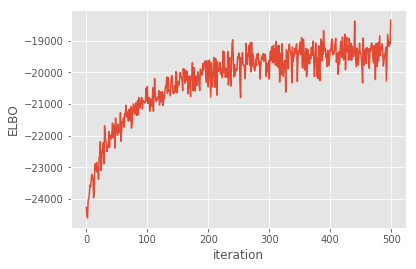

In [19]:
#Testing
M = 5
m = init()
m.X.set_batch_size(1000)
m.Y.set_batch_size(1000)

m.feature.trainable = False
logger = run_opt(m, gpflow.test_util.notebook_niter(5000), var_list=[(m.q_mu, m.q_sqrt)])
#Plotting for optimization algorithm
plt.plot(-np.array(logger.logf))
plt.xlabel('iteration')
plt.ylabel('ELBO')

In [20]:
 #NMSE calculation
rmse = np.sqrt(mean_squared_error(y_test,m.predict_y(X_test)[0]))
rmse/(m.predict_y(X_test)[0].max()-m.predict_y(X_test)[0].min())

0.95512157916001827

In [21]:
#Negative log probability density
-m.predict_density(X_test,m.predict_y(X_test)[0]).mean()

0.89971597573453899

In [23]:
M_change = [5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100]
opt_time = []
nlpd_mean = []
nlpd_std = []
nrmse = []

In [24]:
#Algorithm
for i in M_change:
    #Fitting model
    M = i
    m = init()
    m.X.set_batch_size(1000)
    m.Y.set_batch_size(1000)
    
    #Optimization process
    m.feature.trainable = False
    start_time = time.time()
    logger = run_opt(m, gpflow.test_util.notebook_niter(5000), var_list=[(m.q_mu, m.q_sqrt)])
    opt_time.append(time.time() - start_time)
    
    #NMSE calculation
    rmse = np.sqrt(mean_squared_error(y_test,m.predict_y(X_test)[0]))
    nrmse.append(rmse/(m.predict_y(X_test)[0].max()-m.predict_y(X_test)[0].min()))
    
    #Negative log probability density
    nlpd_mean.append(-m.predict_density(X_test,m.predict_y(X_test)[0]).mean())
    nlpd_std.append(np.std(m.predict_density(X_test,m.predict_y(X_test)[0])))
    

In [25]:
opt_time

[69.05826187133789,
 87.88520431518555,
 76.614981174469,
 80.12539291381836,
 89.24390602111816,
 95.73416185379028,
 99.99552893638611,
 108.68836569786072,
 107.41689658164978,
 132.51832389831543,
 138.14488792419434,
 140.58645677566528,
 145.4117591381073,
 173.21396279335022,
 170.43615055084229,
 184.77963089942932,
 215.12012696266174,
 225.9563069343567,
 232.63374209403992,
 242.8927447795868]

In [27]:
nrmse

[0.44226127701738432,
 0.34015792223318242,
 0.26788550101501429,
 0.26337705233011366,
 0.2834589741038101,
 0.24358563400692698,
 0.23456501112016645,
 0.23728036896153584,
 0.21731561741381472,
 0.20423289108259265,
 0.20507127103981623,
 0.21766824213607813,
 0.2039040130734299,
 0.20671120172093402,
 0.20957705625277417,
 0.20792678262244421,
 0.21053250194819451,
 0.2053108581982781,
 0.20949784183830608,
 0.2096836741255699]

In [28]:
nlpd_mean

[0.7480517303623444,
 0.76467379059504548,
 0.66238810311154928,
 0.65726619472475056,
 0.63927393326090332,
 0.62104153730288514,
 0.61852235733512839,
 0.60585532337177006,
 0.59804876494272108,
 0.59437095666449646,
 0.59412266008854953,
 0.59133272957620497,
 0.58520919969548957,
 0.58438711246455943,
 0.58358480097038989,
 0.58206433292243254,
 0.58276869216776528,
 0.58384299646945748,
 0.5820044918208328,
 0.57837349458370613]

In [29]:
nlpd_std

[0.0033329360372547248,
 0.0020147922677030581,
 0.0032604587988656281,
 0.003143737574551875,
 0.0030854601326605908,
 0.0033589410143184612,
 0.0024733913934722484,
 0.0034828872127400669,
 0.0033515282481233408,
 0.0026425361973892664,
 0.002107095830204261,
 0.0021135381165835001,
 0.0037075718999079509,
 0.0025450986936578586,
 0.0032809526302836549,
 0.0022686845098835906,
 0.0026232182673174508,
 0.0021356877416683329,
 0.0020079165017179742,
 0.0022551507541418636]

In [31]:
import pandas
opt_time_savigp = [2236.295343,2347.053627,672.1633081,1572.448648,1250.623508,1533.415169,1126.901034,847.05339,1015.187847,877.1523671,1474.128043,1682.994517,1242.520733,1541.206088,2681.151737,1850.701075,4221.894315,1664.424773,1986.446846,2555.632496]
nlpd_mean_savigp=[]
nlpd_std_savigp=[]
nrmse_savigp=[]

In [32]:
for i in M_change:
    test_result = pandas.read_csv('testing_bike/test_' + str(i) + '.csv')
    Ytrue = test_result["Ytrue0"].values.astype(np.float)
    Ypred = test_result["Ypred__0"].values.astype(np.float)
    NLPD = test_result["nlpd"].values.astype(np.float)
    rmse = np.sqrt(mean_squared_error(Ytrue,Ypred))
    nrmse_savigp.append(rmse/((Ypred.max()-Ypred.min())))
    nlpd_mean_savigp.append(NLPD.mean()) 
    nlpd_std_savigp.append(np.std(NLPD))

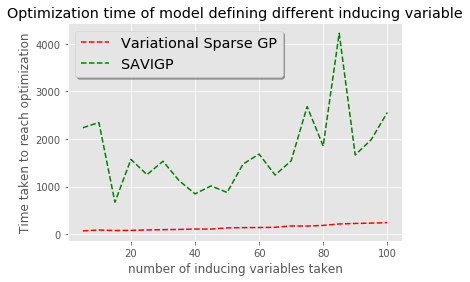

In [33]:
#Plot for optimization time
plt.title("Optimization time of model defining different inducing variable")
plt.xlabel("number of inducing variables taken")
plt.ylabel("Time taken to reach optimization")
plt.plot(M_change,opt_time,'r--',label="Variational Sparse GP")
plt.plot(M_change,opt_time_savigp,'g--',label = "SAVIGP")
plt.legend(loc='upper left', shadow=True, fontsize='x-large')
plt.savefig('opt_time_bike.png', bbox_inches='tight')
plt.show()

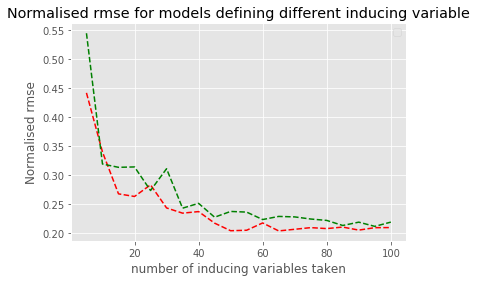

In [34]:
#Plot for nrmse
#inf replaced by 1 = indicating a bad nrmse
plt.title("Normalised rmse for models defining different inducing variable")
plt.xlabel("number of inducing variables taken")
plt.ylabel("Normalised rmse")
plt.legend()
plt.plot(M_change,nrmse,'r--',label="Variational Sparse GP")
plt.plot(M_change,nrmse_savigp,'g--',label = "SAVIGP")
plt.savefig('nrmse_bike.png', bbox_inches='tight')
plt.show()

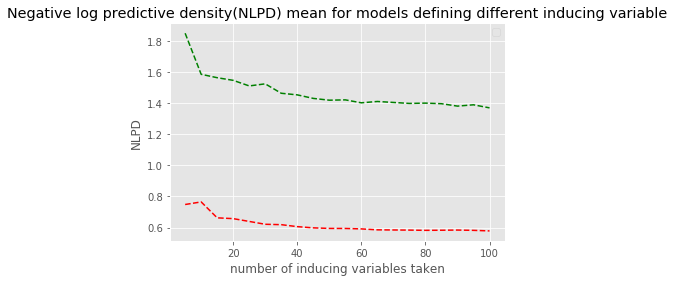

In [35]:
#Plot for nlpd mean
#inf replaced by 1 = indicating a bad nrmse
plt.title("Negative log predictive density(NLPD) mean for models defining different inducing variable")
plt.xlabel("number of inducing variables taken")
plt.ylabel("NLPD")
plt.legend()
plt.plot(M_change,nlpd_mean,'r--',label="Variational Sparse GP")
plt.plot(M_change,nlpd_mean_savigp,'g--',label = "SAVIGP")
plt.savefig('nlpd_mean_bike.png', bbox_inches='tight')
plt.show()

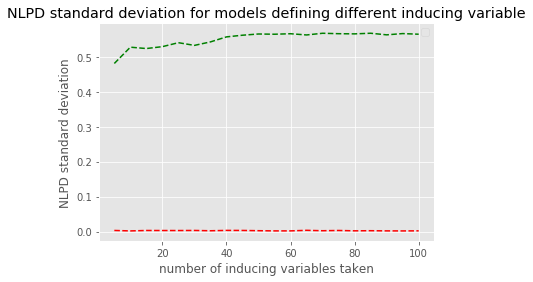

In [37]:
#Plot for nlpd std
plt.title("NLPD standard deviation for models defining different inducing variable")
plt.xlabel("number of inducing variables taken")
plt.ylabel("NLPD standard deviation")
plt.legend()
plt.plot(M_change,nlpd_std,'r--',label="Variational Sparse GP")
plt.plot(M_change,nlpd_std_savigp,'g--',label = "SAVIGP")
plt.savefig('nlpd_std_bike.png', bbox_inches='tight')
plt.show()

In [42]:
nlpd_mean_savigp

[1.8482136400418692,
 1.584442984132532,
 1.5625905730421361,
 1.545639600497603,
 1.5097622080429227,
 1.5231515479143165,
 1.4626292736867779,
 1.4523469373812956,
 1.429631540934341,
 1.418137755052159,
 1.4202027388308416,
 1.4013112913448236,
 1.4099054525518466,
 1.4037173857908427,
 1.3973497902693139,
 1.3994039988316793,
 1.3955716509039648,
 1.38012227152214,
 1.388552307066184,
 1.3688433915066895]

In [38]:
#Try to compute with a lot bigger inducing variables